## 1. 引入需要的库

In [1]:
import cv2
from matplotlib import pyplot as plt

## 2. 定义要读取的图像文件

In [2]:
# image_path = "dog-sheep-data\\images\\train\\111.jpg"
image_path = "0-cover.jpg"

In [3]:
img = cv2.imread(image_path)

## 3. 简单测试

In [4]:
# 先进行图像降噪
img = cv2.bilateralFilter(img, 21, 75, 75)

In [5]:
# 利用各个检测算子进行检测
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobelxy = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3)
sobelxy5 = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
sobel = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
canny = cv2.Canny(img, 100, 200)

In [6]:
# 把所有结果映射回原始类型uint8
laplacian = cv2.convertScaleAbs(laplacian)
sobelxy = cv2.convertScaleAbs(sobelxy)
sobelxy5 = cv2.convertScaleAbs(sobelxy5)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobel = cv2.convertScaleAbs(sobel)

In [7]:
titles = ['Original', 'Laplacian', 'Sobel dx=1 ksize=3', 'Sobel dy=1 ksize=3', 'Sobel ksize=3', 'Sobel dx=dy=1 ksize=3',
          'Sobel dx=dy=1 ksize=5', 'canny']
imgs = [img, laplacian, sobelx, sobely, sobel, sobelxy, sobelxy5, canny]

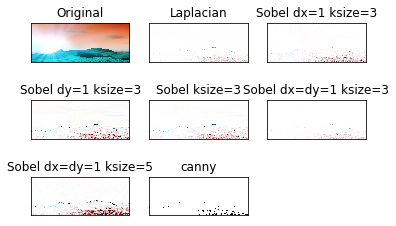

In [8]:
for i in range(len(titles)):
    plt.subplot(3, 3, i + 1), 
    if i == 0:
        plt.imshow(imgs[i], cmap='gray')
    else:
        plt.imshow(255-imgs[i], cmap='gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
plt.savefig('1-comprison.png', dpi=300)

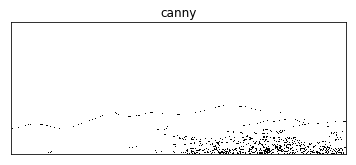

In [9]:
for i in range(len(titles)):
    if i == 0:
        pass
    else:
        plt.imshow(255-imgs[i], cmap='gray')
        plt.title(titles[i]), plt.xticks([]), plt.yticks([])
        plt.savefig(titles[i]+".png", dpi=300)

## 4. Canny 算子调整参数
可以通过canny算子的low_threshold和high_threshold使得检测结果更符合需求  
请同学们自己尝试